# 勾配ブースティング決定木の可視化
<iframe width="560" height="315" src="https://www.youtube.com/embed/ZgssfFWQbZ8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

勾配ブースティングを用いた回帰について、仕組みを理解するために可視化をします。

```{hint}
- [sklearn.ensemble.GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
- [scikit-learn/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py](https://github.com/scikit-learn/scikit-learn/blob/0d378913be6d7e485b792ea36e9268be31ed52d0/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py#L869)
```

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if str(get_ipython()).startswith("<google.colab."):
    !pip install japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# UserWarningを一時的に無視
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 乱数
np.random.seed(777)

# 訓練データに回帰モデルを当てはめる

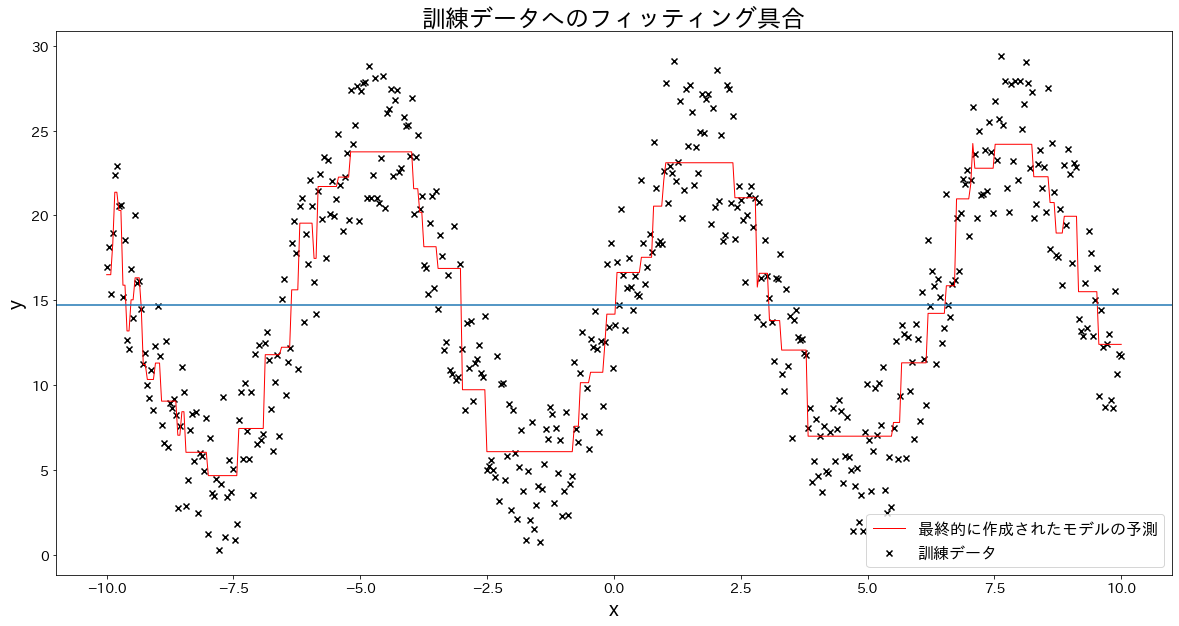

In [4]:
# 訓練データ
n_samples = 500
X = np.linspace(-10, 10, n_samples)[:, np.newaxis]
noise = np.random.rand(X.shape[0]) * 10

# 目的変数
y = (np.sin(X).ravel()) * 10 + 10 + noise

# 回帰モデルを作成
n_estimators = 10
learning_rate = 0.5
reg = GradientBoostingRegressor(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
)
reg.fit(X, y)
y_pred = reg.predict(X)

# 訓練データへのフィッティング具合を確認する
plt.figure(figsize=(20, 10))
plt.scatter(X, y, c="k", marker="x", label="訓練データ")
plt.plot(X, y_pred, c="r", label="最終的に作成されたモデルの予測", linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(y=np.mean(y))
plt.title("訓練データへのフィッティング具合")
plt.legend()
plt.show()

# 最終的な予測結果を木ごとに分解してみる

Text(0, 0.5, 'y')

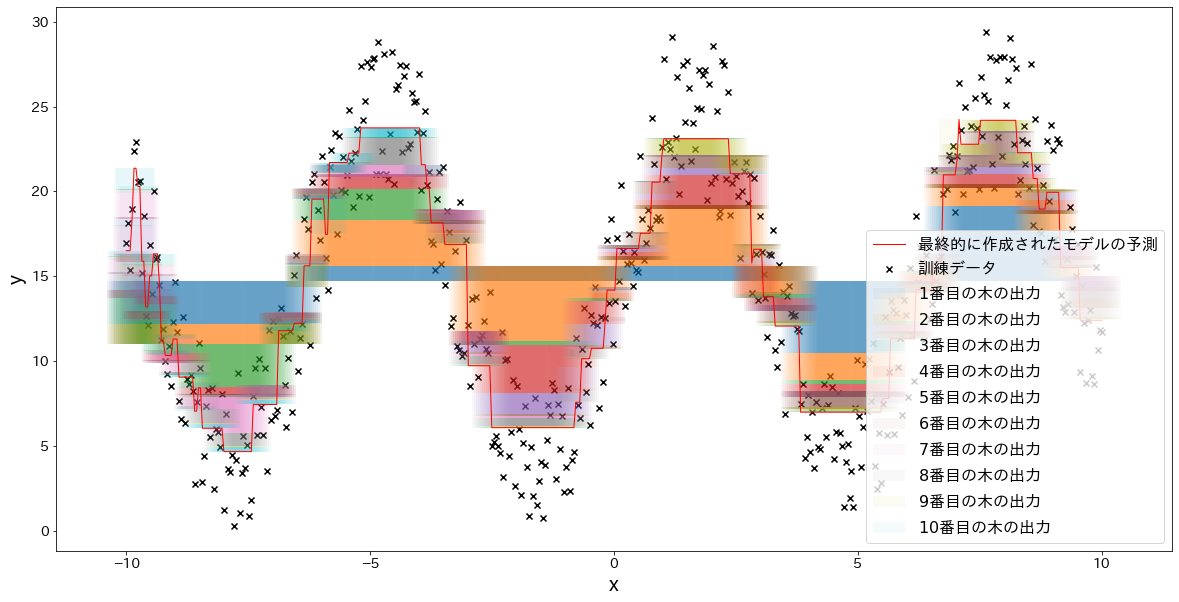

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
ind = np.arange(n_samples)
temp = np.zeros(n_samples) + np.mean(y)

for i in range(n_estimators):
    res = reg.estimators_[i][0].predict(X) * learning_rate
    ax.bar(X.flatten(), res, bottom=temp, label=f"${i+1}$番目の木の出力", alpha=0.05)
    temp += res

plt.scatter(X.flatten(), y, c="k", marker="x", label="訓練データ")
plt.plot(X, y_pred, c="r", label="最終的に作成されたモデルの予測", linewidth=1)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

# 少しずつ誤差を修正していく様子を確認する

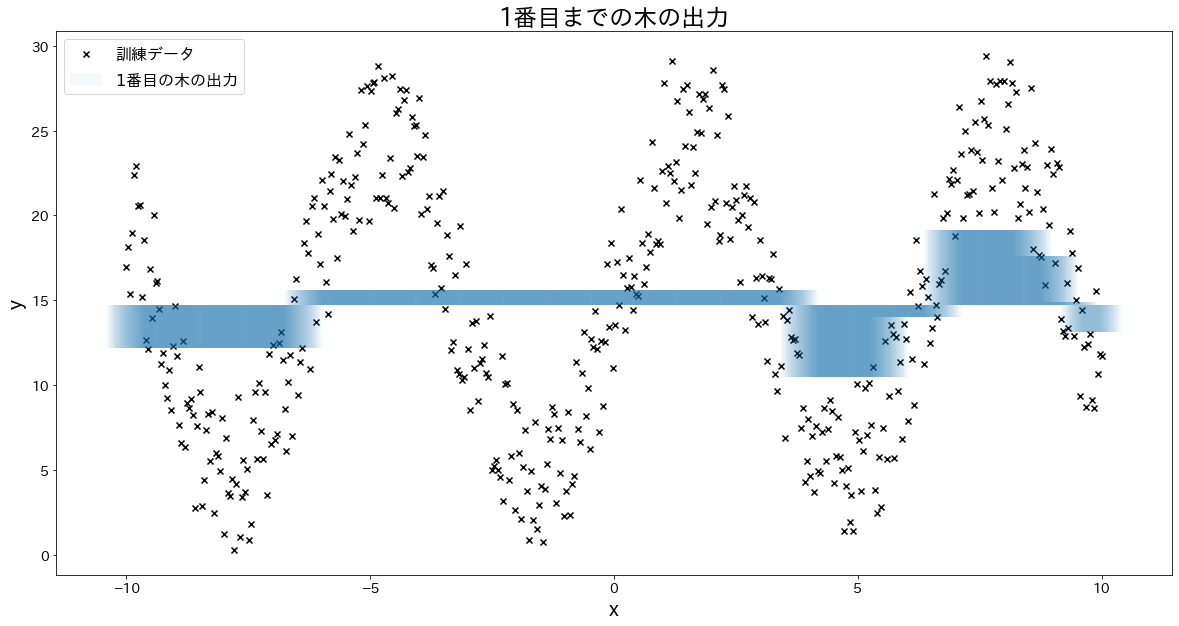

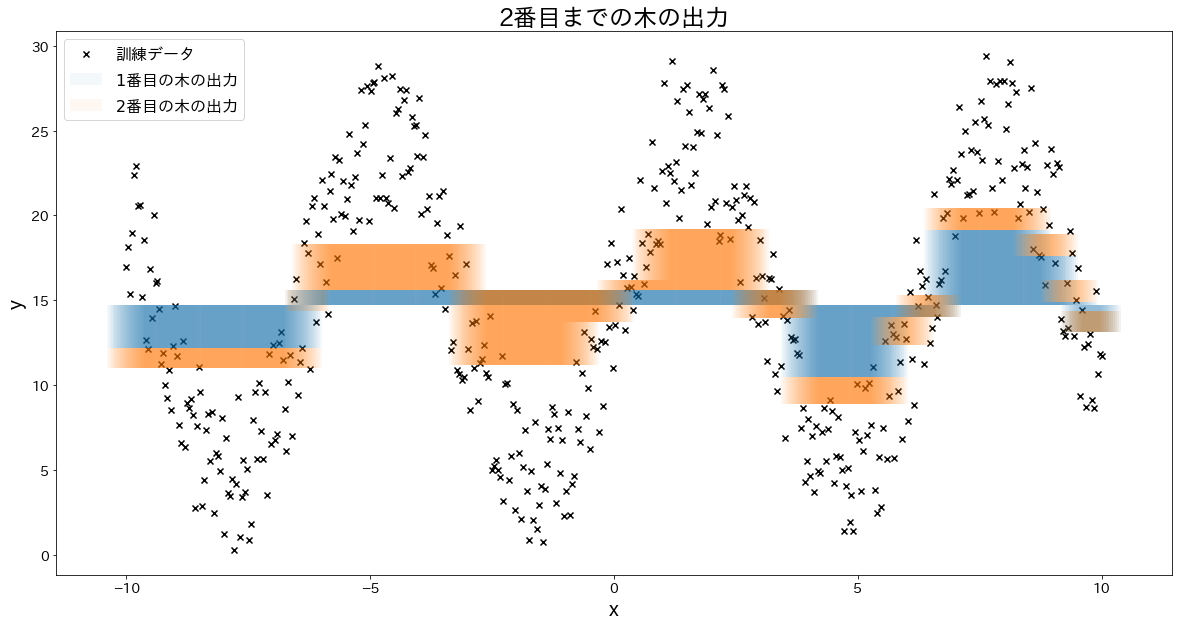

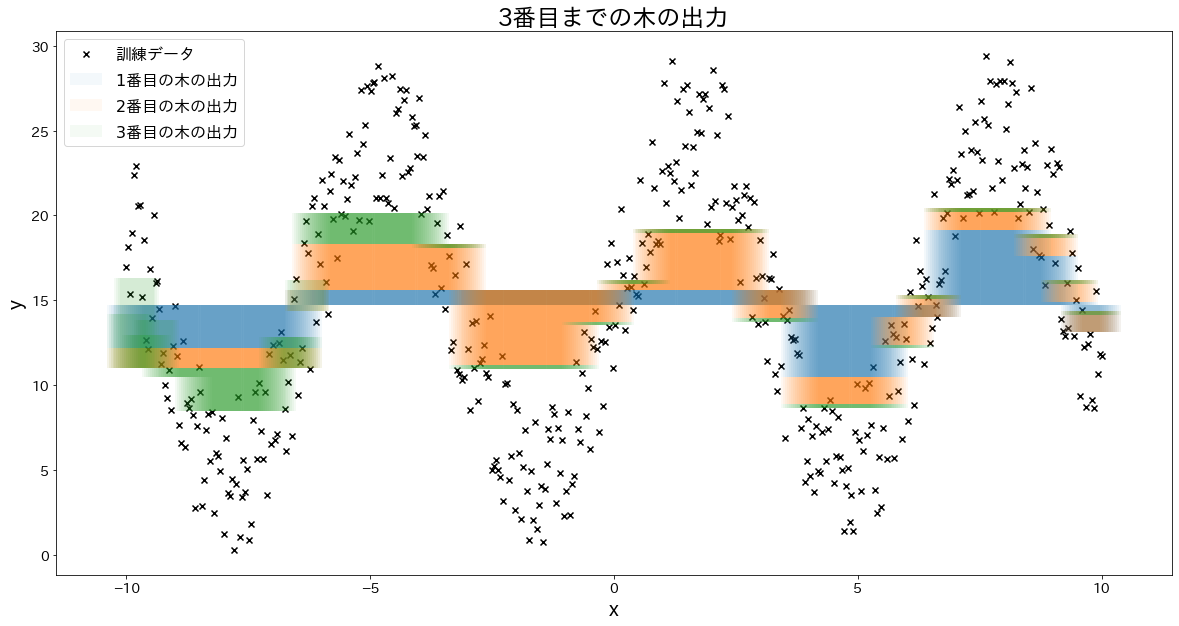

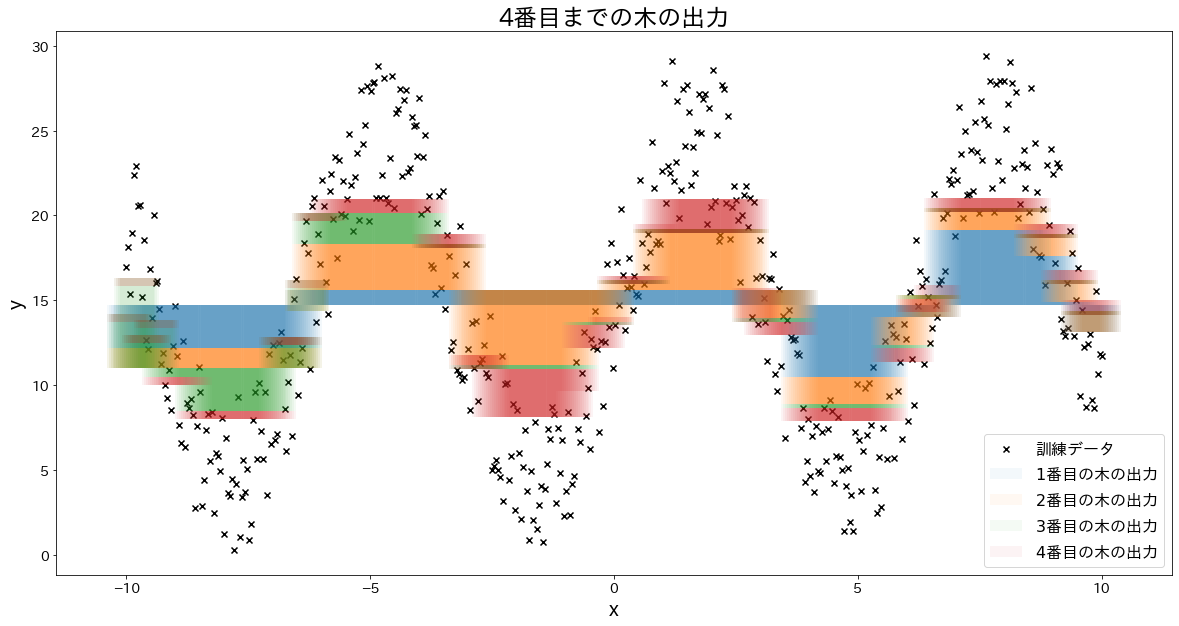

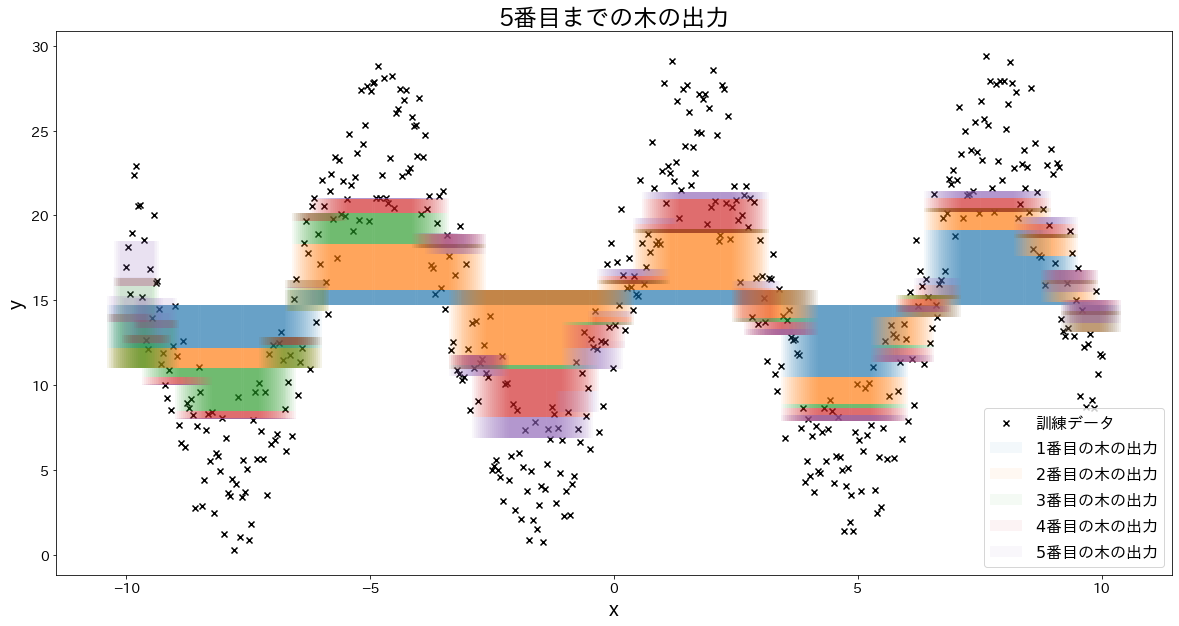

In [6]:
for i in range(5):
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.title(f"{i+1}番目までの木の出力")
    ind = np.arange(n_samples)
    temp = np.zeros(n_samples) + np.mean(y)

    for j in range(i + 1):
        res = reg.estimators_[j][0].predict(X) * learning_rate
        ax.bar(X.flatten(), res, bottom=temp, label=f"${j+1}$番目の木の出力", alpha=0.05)
        temp += res

    plt.scatter(X.flatten(), y, c="k", marker="x", label="訓練データ")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    try:
        plt.show()
    except KeyboardInterrupt:
        # TODO: jupyter bookのビルドで時間がかかるプロットが中断してしまうため、一時的に例外処理を挟む
        break